# FIFA Player Height Analysis (2011 vs 2021)
This notebook analyzes how player height has changed between FIFA 11 and FIFA 21, and whether this affects gameplay strategies such as headers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fifa11 = pd.read_csv("fifa11.csv")
fifa21 = pd.read_csv("fifa21.csv")

fifa11['year'] = 2011
fifa21['year'] = 2021

df = pd.concat([fifa11, fifa21], ignore_index=True)
df.head()

,id,Fullname,current_rating,potential_rating,height,weight,preferred_foot,birth_date,preferred_positions,work_rate,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,year
0,3721,Nenad Dzodic,72,75,188,75,Right,04/01/1977,CB-RB-SW,NaN,...,12,57,17,5,13,5,11,8.0,NaN,2011
1,192989,Fanol Perdedaj,60,78,172,69,Right,16/07/1991,CDM-CM,NaN,...,49,31,49,9,9,13,14,13.0,NaN,2011
2,199296,Kliment Taseski,52,68,180,75,Right,27/05/1991,CAM-ST-RW-CM,NaN,...,50,56,57,12,14,15,13,5.0,NaN,2011
3,150655,Gilles Yapi Yapo,73,82,171,63,Right,30/01/1982,CM-RM-CDM,NaN,...,68,78,63,5,7,10,12,11.0,NaN,2011
4,157190,John Russell,55,63,174,71,Right,18/05/1985,CM-RM-RW,NaN,...,42,57,46,5,6,8,14,13.0,NaN,2011


## 1. Has the average height of players changed from 2011 to 2021?

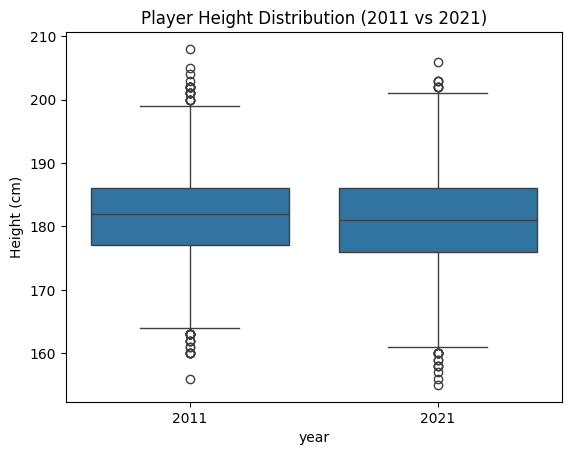

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,15020.0,181.461718,6.336330,156.0,177.0,182.0,186.0,208.0
2021,19002.0,181.222661,6.846444,155.0,176.0,181.0,186.0,206.0


In [2]:
sns.boxplot(data=df, x="year", y="height")
plt.title("Player Height Distribution (2011 vs 2021)")
plt.ylabel("Height (cm)")
plt.show()

df.groupby("year")["height"].describe()

The table summarizes the height of players in the 2011 and 2021 versions of FIFA:

Mean :
In 2011, the average height was 181.46 cm, while in 2021, it slightly dropped to 181.22 cm.
 This shows a very small decrease in average height — less than half a centimeter — which is not significant.

std:
The spread of height values increased slightly, from 6.34 in 2011 to 6.85 in 2021.
This means player heights became a bit more varied in the 2021 version.

Minimum and Maximum Heights:

The shortest player in 2021 (155 cm) is 1 cm shorter than in 2011 (156 cm).

The tallest player in 2011 was 208 cm, while in 2021, it was slightly shorter at 206 cm.

Quartiles (25%, 50%, 75%):
These values are nearly identical in both years, indicating that the distribution of player heights has remained stable over time.



There is no strong evidence that player height has significantly decreased between FIFA 2011 and 2021. While minor changes exist, they are not large enough to explain a major gameplay difference like the reduced effectiveness of heading.

## 2. How has the distribution of player heights evolved?

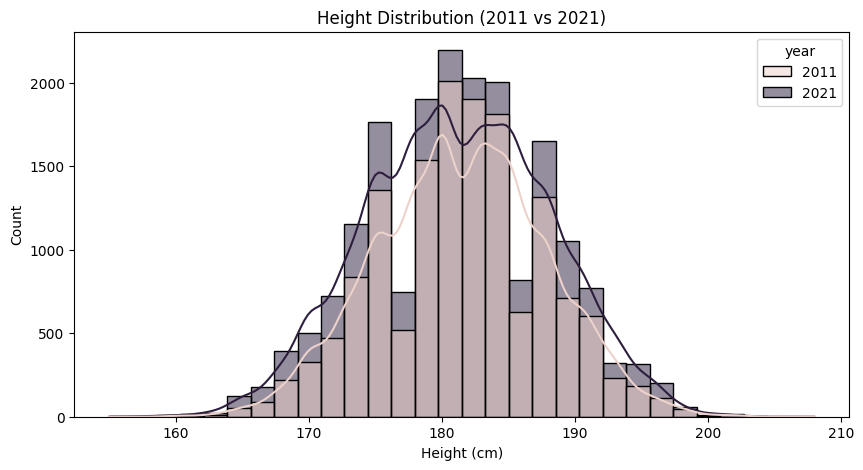

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="height", hue="year", kde=True, bins=30)
plt.title("Height Distribution (2011 vs 2021)")
plt.xlabel("Height (cm)")
plt.show()

This chart shows how player height is distributed in FIFA 2011 and FIFA 2021. Both games have a normal distribution centered around average height, but FIFA 2021 has a tighter range, especially around 180–185 cm. This suggests that the newer version focuses more on average-height players.

## 3. Does height correlate with heading and jumping ability?

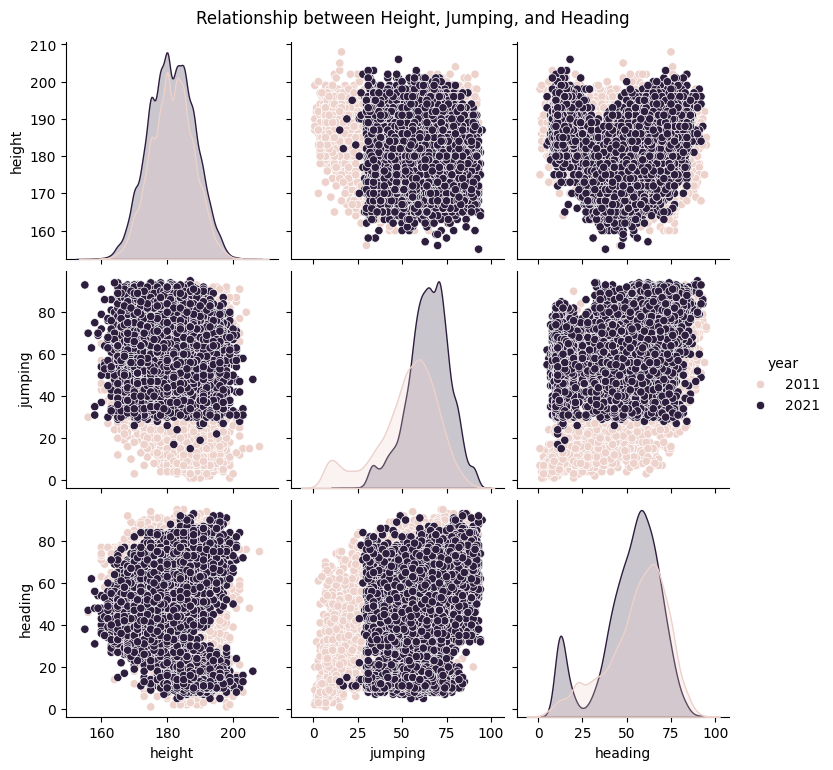

,height,jumping,heading
height,1.000000,-0.008431,-0.088138
jumping,-0.008431,1.000000,0.432179
heading,-0.088138,0.432179,1.000000


In [5]:
sns.pairplot(df, vars=["height", "jumping", "heading"], hue="year")
plt.suptitle("Relationship between Height, Jumping, and Heading", y=1.02)
plt.show()

df[["height", "jumping", "heading"]].corr()

The pairplot shows how height, jumping, and heading are distributed and related among FIFA players in 2011 and 2021. Based on the correlation matrix:

Height and Jumping: The correlation is very weak and slightly negative (−0.008). This means that taller players are not necessarily better or worse at jumping. In other words, height does not affect jumping ability in a meaningful way.

Jumping and Heading: There is a moderate positive correlation (0.43), meaning players who jump better usually have better heading ability. This makes sense in football, as heading often depends on how well a player can reach the ball in the air.

Height and Heading: The correlation is slightly negative (−0.088), which is surprising. It suggests that taller players don’t always have better heading stats, possibly because heading also depends on skill and timing, not just height.

So, although we might expect taller players to be stronger in the air, jumping ability is actually a better predictor of heading performance than height in both versions of FIFA.

## 4. Have weight and strength changed over time?

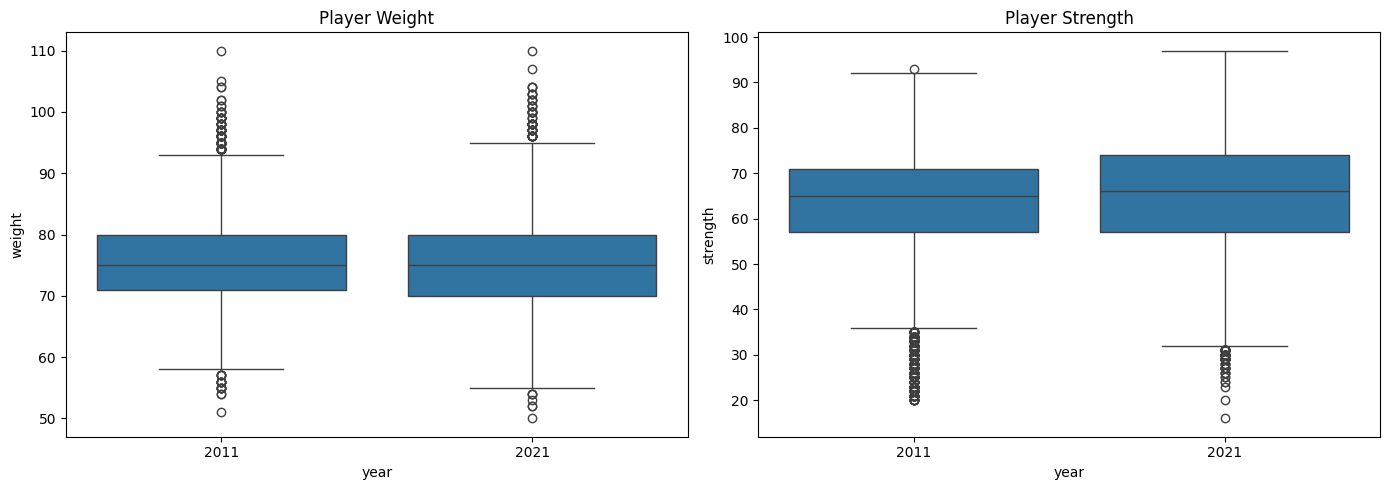

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df, x="year", y="weight", ax=axes[0])
axes[0].set_title("Player Weight")

sns.boxplot(data=df, x="year", y="strength", ax=axes[1])
axes[1].set_title("Player Strength")

plt.tight_layout()
plt.show()

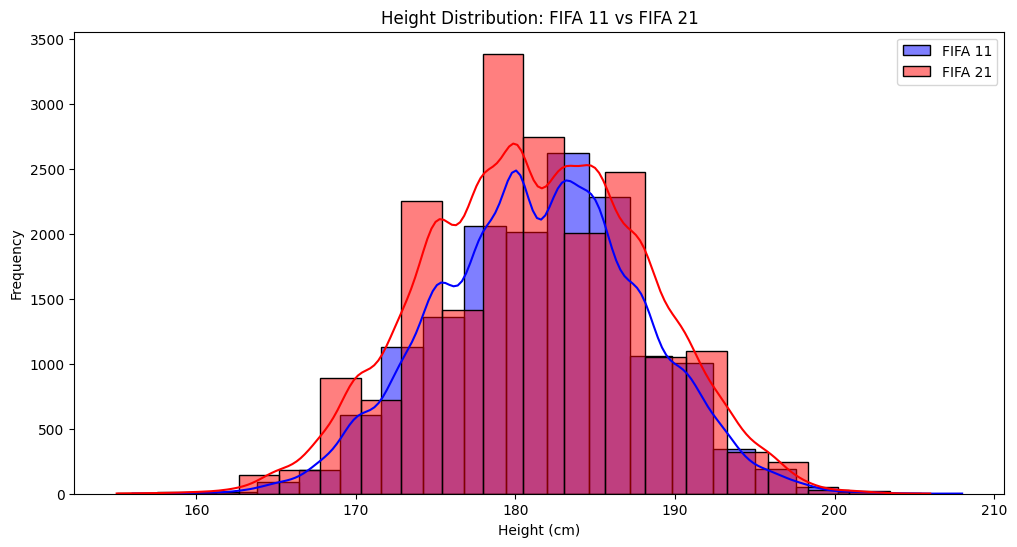

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(fifa11['height'], kde=True, color='blue', label='FIFA 11', bins=20)
sns.histplot(fifa21['height'], kde=True, color='red', label='FIFA 21', bins=20)
plt.legend()
plt.title("Height Distribution: FIFA 11 vs FIFA 21")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()


This histogram compares the height distribution of players in FIFA 11 and FIFA 21 :

Distribution Shape:

Both datasets follow a normal distribution, centered around the 180 cm mark.

FIFA 21 shows a slightly smoother distribution, likely due to a larger or more refined dataset.

Peak Frequency:

The most common player height in both versions lies between 175 cm and 185 cm.

FIFA 21 has a slightly higher peak, indicating more players in that average height range.

Spread:

Both distributions cover a similar range: roughly 160 cm to 200 cm, but FIFA 21 seems to include more players at both height extremes.




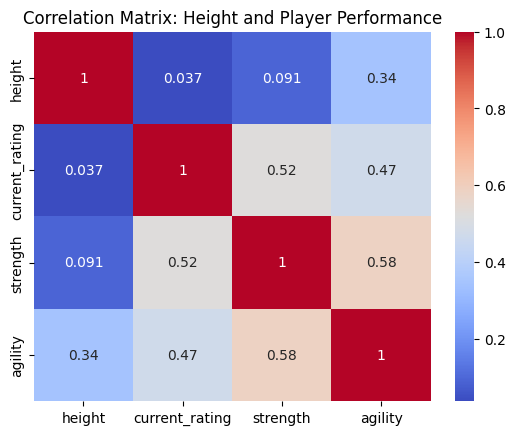

In [11]:

correlation_matrix = fifa11[['height', 'current_rating', 'strength', 'agility']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Height and Player Performance")
plt.show()


This heatmap shows the Pearson correlation coefficients between four variables: height, current rating, strength, and agility.

Height vs Performance Attributes:

Height & Strength (0.091): Weak positive correlation — taller players are slightly more likely to be stronger.

Height & Agility (0.34): Moderate positive correlation — taller players tend to be more agile, but not strongly.

Height & Current Rating (0.037): Very weak correlation — height has almost no direct influence on overall performance ratings.

Inter-attribute Relationships:

Strength & Agility (0.58): Strongest correlation — players who are stronger are often more agile.

Strength & Rating (0.52), Agility & Rating (0.47): Fairly strong correlations — both strength and agility significantly contribute to a player's overall performance.

Conclusion:
While height does have a mild positive relationship with physical attributes, it is not a key determinant of a player's rating. Instead, agility and strength are much more predictive of overall performance.

